## Machine Learning - Coursera Course 
### Python Exercises

#### Imports

In [355]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#### Warmup

In [356]:
A = np.identity(5)
A

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### Exercise -  Multivariable Regression

In [357]:
# Load Data
datafile = 'ex1data2.txt'
data = np.loadtxt(datafile, delimiter=',');
data

array([[  2.10400000e+03,   3.00000000e+00,   3.99900000e+05],
       [  1.60000000e+03,   3.00000000e+00,   3.29900000e+05],
       [  2.40000000e+03,   3.00000000e+00,   3.69000000e+05],
       [  1.41600000e+03,   2.00000000e+00,   2.32000000e+05],
       [  3.00000000e+03,   4.00000000e+00,   5.39900000e+05],
       [  1.98500000e+03,   4.00000000e+00,   2.99900000e+05],
       [  1.53400000e+03,   3.00000000e+00,   3.14900000e+05],
       [  1.42700000e+03,   3.00000000e+00,   1.98999000e+05],
       [  1.38000000e+03,   3.00000000e+00,   2.12000000e+05],
       [  1.49400000e+03,   3.00000000e+00,   2.42500000e+05],
       [  1.94000000e+03,   4.00000000e+00,   2.39999000e+05],
       [  2.00000000e+03,   3.00000000e+00,   3.47000000e+05],
       [  1.89000000e+03,   3.00000000e+00,   3.29999000e+05],
       [  4.47800000e+03,   5.00000000e+00,   6.99900000e+05],
       [  1.26800000e+03,   3.00000000e+00,   2.59900000e+05],
       [  2.30000000e+03,   4.00000000e+00,   4.4990000

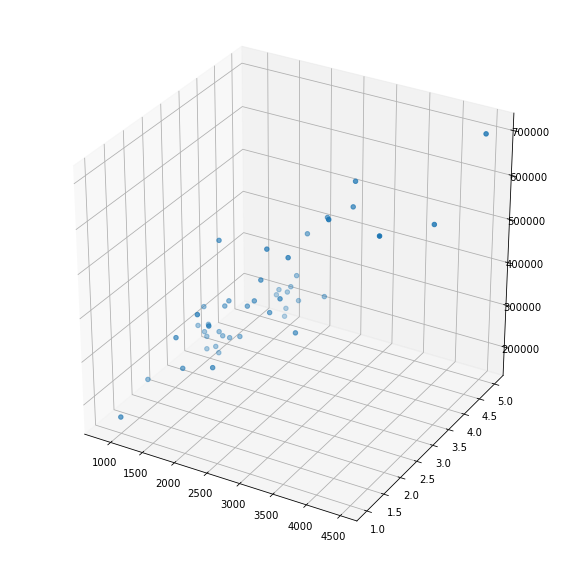

In [358]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
#not the best visualization, but allows you to see that lots of rooms + high square footage = expensive house

#### Cost Function

In [359]:
def h(X, theta):
    return np.dot(X, theta)

def costFuncLinear(X, y, theta):
    """
    X: mxn matrix, examples in rows, features in columns
    y: mx1 vector, result in each row
    theta: nx1 vector, thetas on rows
    """
    m = np.shape(X)[0] # number of training examples
    J = float(1 / (2 * m) * np.dot((h(X,theta)-y).T,(h(X, theta)-y))) 
    return J

#### Gradient Descent

In [360]:
def gradDescent(X, y, theta, alpha, num_iters):
    """
    X: mxn matrix, examples in rows, features in columns
    y: mx1 vector, result in each row
    theta: nx1 vector, thetas on rows
    alpha: float, learning rate
    num_iters: int, number of iterations for gradient descent
    """
    m = np.shape(X)[0] # number of training examples
    J_hist = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        theta = theta - alpha / m * np.dot(X.T, h(X, theta) - y)
        J_hist[i] = costFuncLinear(X, y, theta)
    
    return theta, J_hist

#### Normalize Data

In [367]:
def normalizeX(X):
    """
    X: mxn matrix, examples in rows, features in columns
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = X.copy() # make sure to copy, otherwise, it could throw off results
    for i in range(np.shape(X)[1]):
        X_norm[:,i] = (X_norm[:,i] - mu[i]) / sigma[i]
        
        
    return X_norm, mu, sigma

#### Run Gradient Desecent

In [368]:
# Create X, y
X = data[:, 0:-1]
y = data[:,-1].reshape(np.shape(X)[0],1) # this was the most frustrating thing so far. 
X_norm, mu, sigma = normalizeX(X)
X_norm = np.insert(X_norm,0,1, axis=1)

# initialize theta with ones column
init_theta = np.zeros((X_norm.shape[1],1)) # takes a tuple 

# set up parameters
num_iters = 1500
alpha = 0.03

In [369]:
theta, J_hist = gradDescent(X_norm, y, init_theta, alpha, num_iters)
theta

array([[ 340412.65957447],
       [ 109447.79634183],
       [  -6578.35472634]])

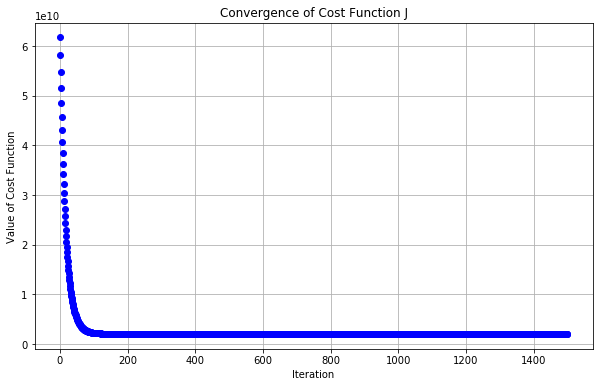

In [370]:
fig2 = plt.figure(figsize=(10,6))
plt.plot(range(num_iters), J_hist, 'bo')
plt.grid(True)
plt.title('Convergence of Cost Function J')
plt.xlabel('Iteration')
plt.ylabel('Value of Cost Function')

In [380]:
# Check answer
# House with 1650 sq. ft. and 3 bedrooms
test = np.array([1650, 3]).reshape((1,2))
test_norm = (test - mu) / sigma
test_norm = np.insert(test_norm,0,1, axis=1)
print('Price of a house with 1650 sq.ft. and 3 beddrooms: ${:.2f}'.format(float(np.dot(test_norm, theta))))

Price of a house with 1650 sq.ft. and 3 beddrooms: $293081.46


### Normal Equation

In [383]:
from numpy.linalg import inv

In [405]:
normal_X = np.insert(X,0,1,axis=1)
normal_theta = np.dot(np.dot(inv(np.dot(normal_X.T, normal_X)), normal_X.T), y)

In [408]:
result = float(np.dot([1,1650,3],normal_theta))
print('Price of a house with 1650 sq.ft. and 3 beddrooms, using Normal Eqn: ${:.2f}'.format(result))

Price of a house with 1650 sq.ft. and 3 beddrooms, using Normal Eqn: $293081.46
